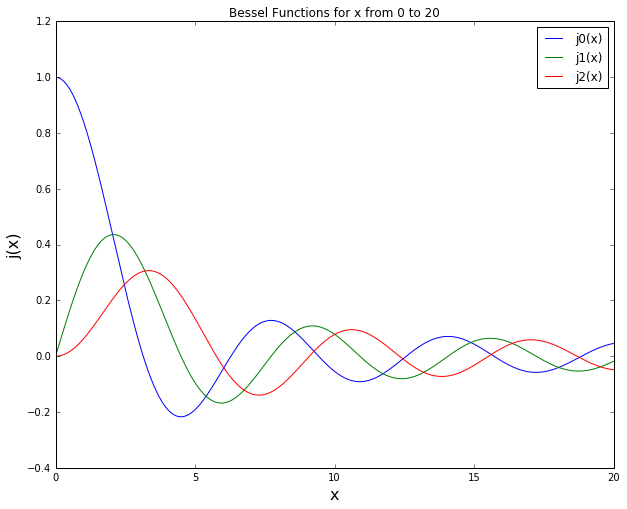

In [12]:
%matplotlib inline

# Exercise 1

x_space = np.linspace(0,20,200)
length = len(x_space)

def j_n(xval,n):
    '''Bessel functions for orders of 0 through 2
    inputs: xval (float), n (order of the function)
    outputs: j_n'''
    if xval == 0 and n == 0:
        j = 1
    elif n == 0:
        j = np.sin(xval)/xval
    elif xval == 0 and n == 1:
        j = 0
    elif n == 1:
        j = (j_n(xval,0)*(1/xval))-(np.cos(xval)/xval)
    elif xval == 0 and n == 2:
        j = 0
    else:
        j = (((3/xval**2)-1)*j_n(xval,0))-((3*np.cos(xval))/xval**2)
    return j

j_0vals = []
for i in range(0,length):
    j_0vals.append(j_n(x_space[i],0))

j_1vals = []
for i in range(0,length):
    j_1vals.append(j_n(x_space[i],1))

j_2vals = []
for i in range(0,length):
    j_2vals.append(j_n(x_space[i],2))
    
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(x_space,j_0vals, label='j0(x)')
ax.plot(x_space,j_1vals, label='j1(x)')
ax.plot(x_space,j_2vals, label='j2(x)')
ax.set_ylabel('j(x)',fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_title('Bessel Functions for x from 0 to 20')
ax.legend(loc='upper right')

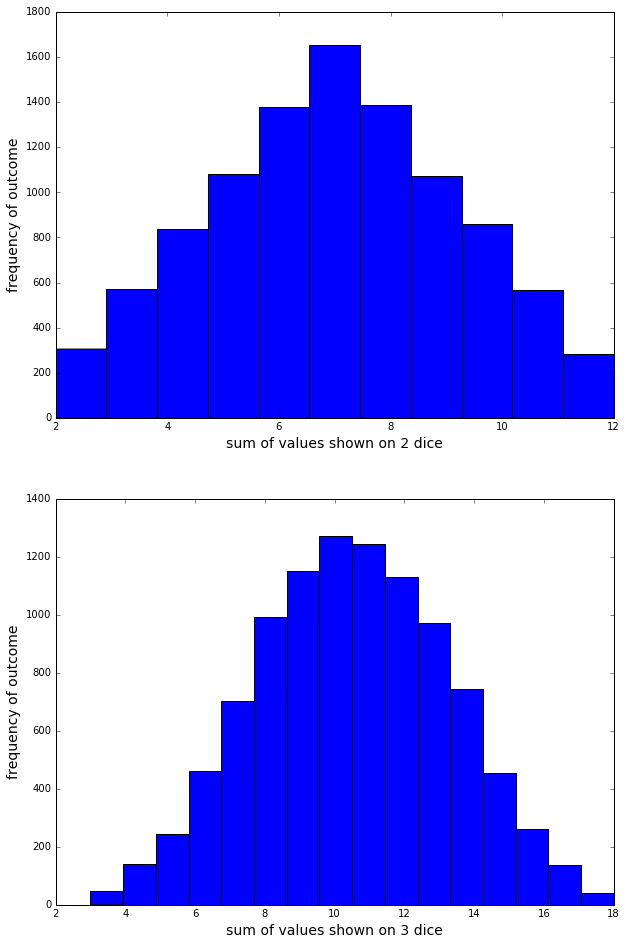

In [8]:
# Exercise 2

def rollndice(num):
    '''calculate the sum of the values of n dice thrown
    inputs: num (number of dice thrown)
    outputs: sum of the values shown on the dice'''
    
    thrownresults = []
    for k in range(0,(num)):
        thrownresults.append(np.random.random_integers(6))
    return np.sum(thrownresults)

test = []
for i in range(0,10000):
    test.append(rollndice(2))
    
test2 = []
for i in range(0,10000):
    test2.append(rollndice(3))
    
fig,ax1=plt.subplots(2,1,figsize=(10,16))

ax1[0].hist(test,bins=11,color='b')  # there are 11 possible outcomes throwing 2 dice (values of 2 through 12)
ax1[0].set_xlabel('sum of values shown on 2 dice',fontsize=14)
ax1[0].set_ylabel('frequency of outcome',fontsize=14)
ax1[1].hist(test2,bins=16,color='b') # 16 possible outcomes throwing 3 dice
ax1[1].set_xlabel('sum of values shown on 3 dice',fontsize=14)
ax1[1].set_ylabel('frequency of outcome',fontsize=14)

In [28]:
# Exercise 4

def LineFitWt(x, y):
    '''Weighted linear regression function'''
    
    xhat = np.sum(x/(np.std(y)**2))/np.sum(1/(np.std(y)**2))
    yhat = np.sum(y/(np.std(y)**2))/np.sum(1/(np.std(y)**2))
    
    b = (np.sum(((x-xhat)*y)/(np.std(y)**2)))/(np.sum(((x-xhat)*x)/(np.std(y)**2)))
    a = yhat-b*xhat
    
    chisquared = np.sum(((y-a-b*x)/(np.std(y)))**2)
    return chisquared

def reducedchi(squaredchi,n):
    '''Reduced chi squared parameter from equation 16'''
    
    chisquared_r = squaredchi/(n-2)
    return chisquared_r

time,vel,unc = np.loadtxt('timeveldata.txt',skiprows=3,unpack=True)
nval = len(time)

# What is the uncertainty in the data set? Also, why does the part a say to create a function with x and y as inputs
# and then part b says to use that function with 3 inputs? 

datachi = []
for i in range(0,len(time)):
    datachi.append(LineFitWt(time[i],vel[i]))

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
